In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [103]:
url = "owid-covid-data.csv"

In [104]:
covid_df = pd.read_csv(url)

In [105]:
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [106]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161162 entries, 0 to 161161
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    161162 non-null  object 
 1   continent                                   151492 non-null  object 
 2   location                                    161162 non-null  object 
 3   date                                        161162 non-null  object 
 4   total_cases                                 158274 non-null  float64
 5   new_cases                                   158242 non-null  float64
 6   new_cases_smoothed                          157091 non-null  float64
 7   total_deaths                                140632 non-null  float64
 8   new_deaths                                  140807 non-null  float64
 9   new_deaths_smoothed                         140677 non-null  float64
 

In [107]:
#convert date to datetime format
covid_df['date'] = pd.to_datetime(covid_df['date'])

#create column for month
covid_df['month'] = covid_df['date'].dt.month_name()
covid_df['monthyear'] = covid_df['date'].dt.to_period('M')

#Only use USA data for analysis
covidUS_df = covid_df[covid_df.location == 'United States']

#Only use 2021 data for the analysis
covidUS21_df = covidUS_df[(covidUS_df["date"] >= "2021-01-01") & (covidUS_df["date"] <= "2021-12-31")]

#covidUS21_df["new_col"] = covidUS21_df["date"].astype(str).str(7)

#covidUS_df[covidUS_df["date"].dt.year == 2020]
covidUS21_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,month,monthyear
152689,USA,North America,United States,2021-01-01,20365498.0,172382.0,206170.000,353948.0,2194.0,2614.000,...,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,January,2021-01
152690,USA,North America,United States,2021-01-02,20647872.0,282374.0,214084.429,356547.0,2599.0,2712.000,...,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,January,2021-01
152691,USA,North America,United States,2021-01-03,20851879.0,204007.0,223833.143,357984.0,1437.0,2711.857,...,NaN,2.77,78.86,0.926,472095.6,15.91,45.92,1418.066158,January,2021-01
152692,USA,North America,United States,2021-01-04,21037385.0,185506.0,225535.143,359964.0,1980.0,2726.571,...,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,January,2021-01
152693,USA,North America,United States,2021-01-05,21267189.0,229804.0,229425.286,363568.0,3604.0,2724.857,...,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,January,2021-01


In [108]:
#Caculate sum of total cases by month-year using groupby
covidUS21Cases_df = covidUS21_df.groupby(covid_df["monthyear"]).new_cases.sum()

covidUS21Cases_df.reset_index()

,monthyear,new_cases
0,2021-01,6152180.0
1,2021-02,2408955.0
2,2021-03,1814397.0
3,2021-04,1889101.0
4,2021-05,922194.0
5,2021-06,398304.0
6,2021-07,1318440.0
7,2021-08,4278290.0
8,2021-09,4149516.0
9,2021-10,2510575.0


In [109]:
#Caculate sum of total vaccinations by month-year using groupby
covidUS21Vaccine_df = covidUS21_df.groupby(covid_df["monthyear"]).new_vaccinations_smoothed.sum()

covidUS21Vaccine_df.reset_index()

,monthyear,new_vaccinations_smoothed
0,2021-01,29829101.0
1,2021-02,47439745.0
2,2021-03,80546625.0
3,2021-04,91184228.0
4,2021-05,56701543.0
5,2021-06,25606624.0
6,2021-07,16031294.0
7,2021-08,23672427.0
8,2021-09,21828987.0
9,2021-10,28531432.0


In [158]:
#merge the two dataframes
merge_df = pd.merge(covidUS21Cases_df, covidUS21Vaccine_df, on="monthyear", how="inner")
merge_df = merge_df.reset_index()

In [113]:
merge_df['cumulative_vaccinations'] = merge_df['new_vaccinations_smoothed'].cumsum(axis = 0)
merge_df

,monthyear,new_cases,new_vaccinations_smoothed,cumulative_vaccinations
0,2021-01,6152180.0,29829101.0,29829101.0
1,2021-02,2408955.0,47439745.0,77268846.0
2,2021-03,1814397.0,80546625.0,157815471.0
3,2021-04,1889101.0,91184228.0,248999699.0
4,2021-05,922194.0,56701543.0,305701242.0
5,2021-06,398304.0,25606624.0,331307866.0
6,2021-07,1318440.0,16031294.0,347339160.0
7,2021-08,4278290.0,23672427.0,371011587.0
8,2021-09,4149516.0,21828987.0,392840574.0
9,2021-10,2510575.0,28531432.0,421372006.0


In [157]:
#change datatype for month-year to string
merge_df['monthyear'] = merge_df['monthyear'].astype(str)


<IPython.core.display.Javascript object>


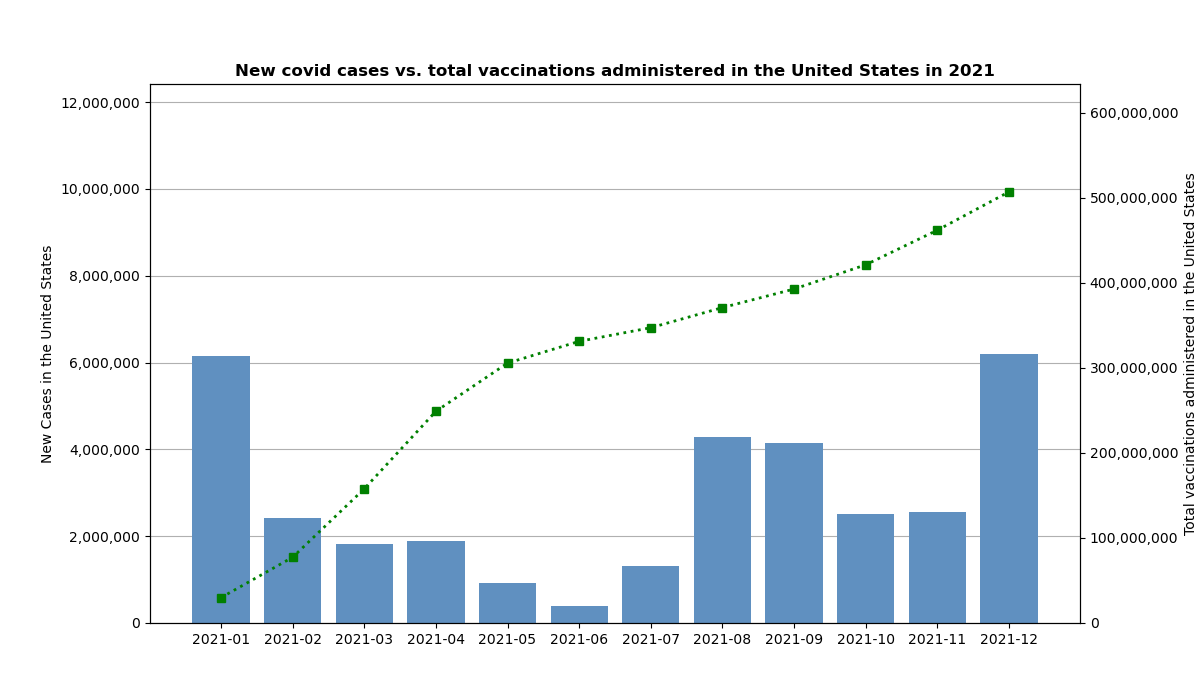

C:\Users\mahajanp\AppData\Local\Temp/ipykernel_10476/3286824142.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
C:\Users\mahajanp\AppData\Local\Temp/ipykernel_10476/3286824142.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])


In [139]:
#Plot combination chart
fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot(1,1,1)
ax1.bar(merge_df['monthyear'], merge_df['new_cases'], color =  "#6090C0")
ax1.set_ylim(0,merge_df['new_cases'].max()*2)
ax1.yaxis.grid(linestyle = '-')
ax1.set_axisbelow(True)

ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
plt.ylabel("New Cases in the United States")

ax2 = ax1.twinx()
ax2.plot(merge_df['monthyear'], merge_df['cumulative_vaccinations'], 's:', color = "green", linewidth = 2)
ax2.set_ylim(0,merge_df['cumulative_vaccinations'].max()*1.25)
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])

#plt.legend(loc="lower right")

plt.title("New covid cases vs. total vaccinations administered in the United States in 2021", fontsize = 12, weight = "bold")
plt.xlabel("Month")
plt.ylabel("Total vaccinations administered in the United States")
plt.show()
plt.savefig("Images/Pic1.png")

In [124]:
#Caculate sum of new deaths by month-year using groupby
covidUS21Deaths_df = covidUS21_df.groupby(covid_df["monthyear"]).new_deaths.sum()

covidUS21Vaccine_df.reset_index()

,monthyear,new_vaccinations_smoothed
0,2021-01,29829101.0
1,2021-02,47439745.0
2,2021-03,80546625.0
3,2021-04,91184228.0
4,2021-05,56701543.0
5,2021-06,25606624.0
6,2021-07,16031294.0
7,2021-08,23672427.0
8,2021-09,21828987.0
9,2021-10,28531432.0


In [121]:
#merge the two dataframes
merge2_df = pd.merge(covidUS21Deaths_df, covidUS21Vaccine_df, on="monthyear", how="inner")
merge2_df = merge2_df.reset_index()
merge2_df
merge2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype    
---  ------                     --------------  -----    
 0   monthyear                  12 non-null     period[M]
 1   new_deaths                 12 non-null     float64  
 2   new_vaccinations_smoothed  12 non-null     float64  
dtypes: float64(2), period[M](1)
memory usage: 416.0 bytes


In [122]:
#change datatype for month-year to string
merge2_df['monthyear'] = merge2_df['monthyear'].astype(str)
merge2_df.dtypes

monthyear                     object
new_deaths                   float64
new_vaccinations_smoothed    float64
dtype: object

In [126]:
merge2_df['cumulative_vaccinations'] = merge2_df['new_vaccinations_smoothed'].cumsum(axis = 0)
merge2_df['cumulative_deaths'] = merge2_df['new_deaths'].cumsum(axis = 0)
merge2_df

,monthyear,new_deaths,new_vaccinations_smoothed,cumulative_vaccinations,cumulative_deaths
0,2021-01,96654.0,29829101.0,29829101.0,96654.0
1,2021-02,65786.0,47439745.0,77268846.0,162440.0
2,2021-03,37263.0,80546625.0,157815471.0,199703.0
3,2021-04,23893.0,91184228.0,248999699.0,223596.0
4,2021-05,18371.0,56701543.0,305701242.0,241967.0
5,2021-06,10530.0,25606624.0,331307866.0,252497.0
6,2021-07,8710.0,16031294.0,347339160.0,261207.0
7,2021-08,27917.0,23672427.0,371011587.0,289124.0
8,2021-09,58709.0,21828987.0,392840574.0,347833.0
9,2021-10,47805.0,28531432.0,421372006.0,395638.0


<IPython.core.display.Javascript object>


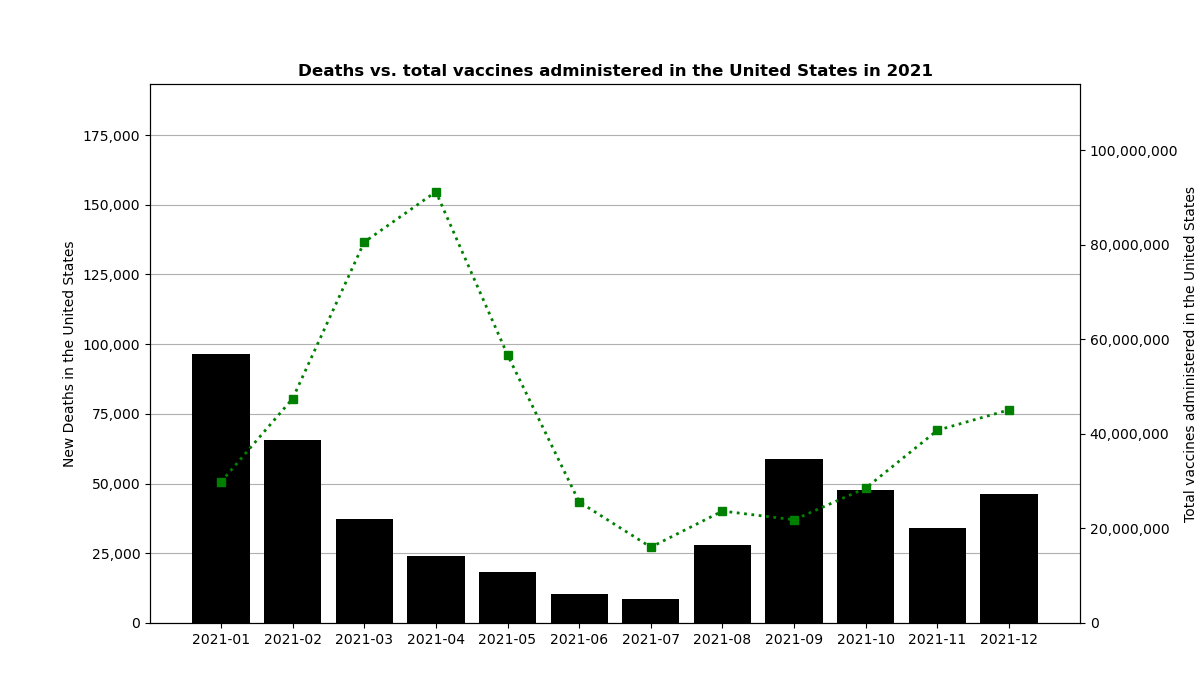

C:\Users\mahajanp\AppData\Local\Temp/ipykernel_10476/4011771211.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
C:\Users\mahajanp\AppData\Local\Temp/ipykernel_10476/4011771211.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])


In [138]:
#Plot combination chart
fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot(1,1,1)
ax1.bar(merge2_df['monthyear'], merge2_df['new_deaths'], color =  "black")
ax1.set_ylim(0,merge2_df['new_deaths'].max()*2)
ax1.yaxis.grid(linestyle = '-')
ax1.set_axisbelow(True)

ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
plt.ylabel("New Deaths in the United States")

ax2 = ax1.twinx()
ax2.plot(merge2_df['monthyear'], merge2_df['new_vaccinations_smoothed'], 's:', color = "green", linewidth = 2)
ax2.set_ylim(0,merge_df['new_vaccinations_smoothed'].max()*1.25)
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])

#plt.legend(loc="lower right")

plt.title("Deaths vs. total vaccines administered in the United States in 2021", fontsize = 12, weight = "bold")
plt.xlabel("Month")
plt.ylabel("Total vaccines administered in the United States")
plt.show()
plt.savefig("Images/Pic2.png")

<IPython.core.display.Javascript object>


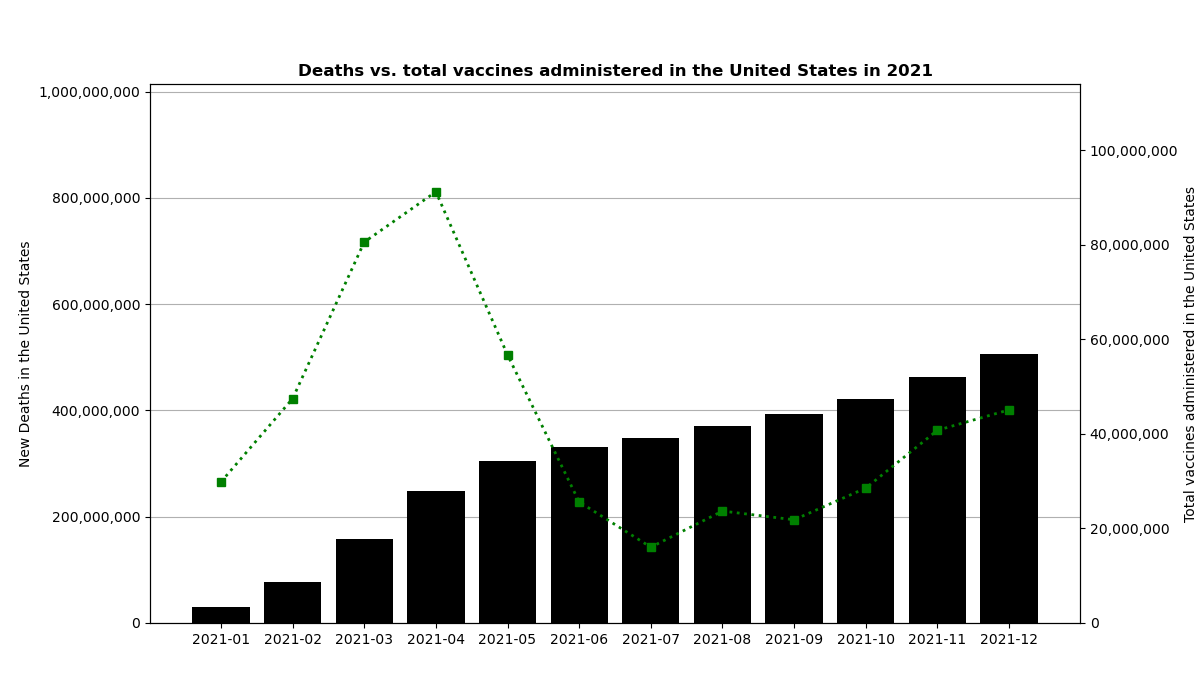

C:\Users\mahajanp\AppData\Local\Temp/ipykernel_10476/4014324194.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
C:\Users\mahajanp\AppData\Local\Temp/ipykernel_10476/4014324194.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])


In [136]:
#Plot combination chart
fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot(1,1,1)
ax1.bar(merge2_df['monthyear'], merge2_df['cumulative_vaccinations'], color =  "black")
ax1.set_ylim(0,merge2_df['cumulative_vaccinations'].max()*2)
ax1.yaxis.grid(linestyle = '-')
ax1.set_axisbelow(True)

ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
plt.ylabel("New Deaths in the United States")

ax2 = ax1.twinx()
ax2.plot(merge2_df['monthyear'], merge2_df['new_vaccinations_smoothed'], 's:', color = "green", linewidth = 2)
ax2.set_ylim(0,merge_df['new_vaccinations_smoothed'].max()*1.25)
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])

#plt.legend(loc="lower right")

plt.title("Deaths vs. total vaccines administered in the United States in 2021", fontsize = 12, weight = "bold")
plt.xlabel("Month")
plt.ylabel("Total vaccines administered in the United States")
plt.show()
plt.savefig("Images/Pic2.png")

<IPython.core.display.Javascript object>


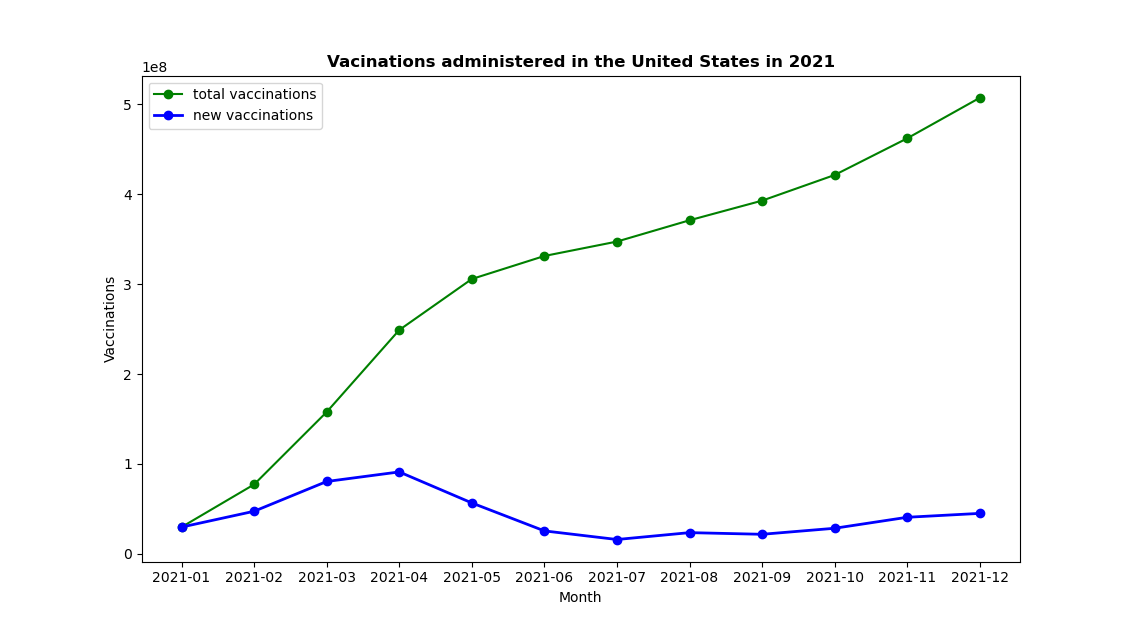

In [156]:
plt.plot(merge2_df['monthyear'], merge2_df['cumulative_vaccinations'], 'o-',color =  "green", label = "total vaccinations")
plt.plot(merge2_df['monthyear'], merge2_df['new_vaccinations_smoothed'],'o-', color = "blue", linewidth = 2, label = "new vaccinations")
plt.xlabel('Month')
plt.ylabel('Vaccinations')
plt.title("Vacinations administered in the United States in 2021", fontsize = 12, weight = "bold")
plt.legend()
plt.show()
plt.savefig("Images/Pic3.png")